Matplotlib is building the font cache; this may take a moment.


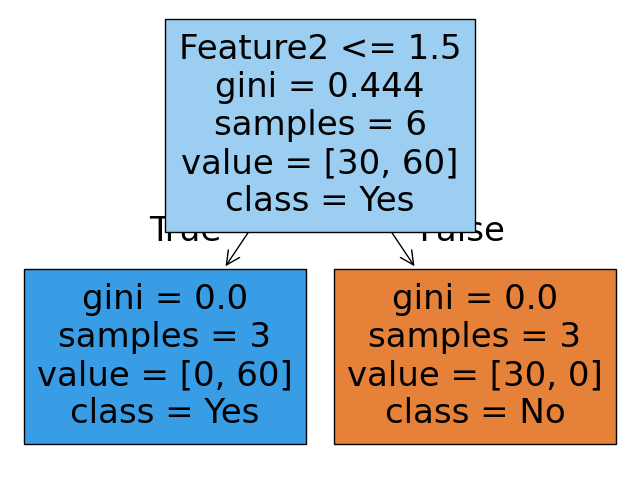

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example dataset (with frequency weights)
data = pd.DataFrame({
    'Feature1': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Feature2': [1, 2, 1, 2, 1, 2],
    'Target': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Weight': [10, 5, 20, 10, 30, 15]  # Frequency weights
})

# Convert categorical variables to numerical labels
data['Feature1'] = data['Feature1'].astype('category').cat.codes  # Encode Feature1
data['Target'] = data['Target'].astype('category').cat.codes  # Encode Target

# Separate features and target
X = data[['Feature1', 'Feature2']]
y = data['Target']
sample_weight = data['Weight']  # Frequency weights

# Build decision tree with sample weighting
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y, sample_weight=sample_weight)  # Apply weights

# Plot the decision tree
plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=['Feature1', 'Feature2'], class_names=['No', 'Yes'], filled=True)
plt.show()


# 1. Basic Decision Tree (non weighted data)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import graphviz

In [3]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

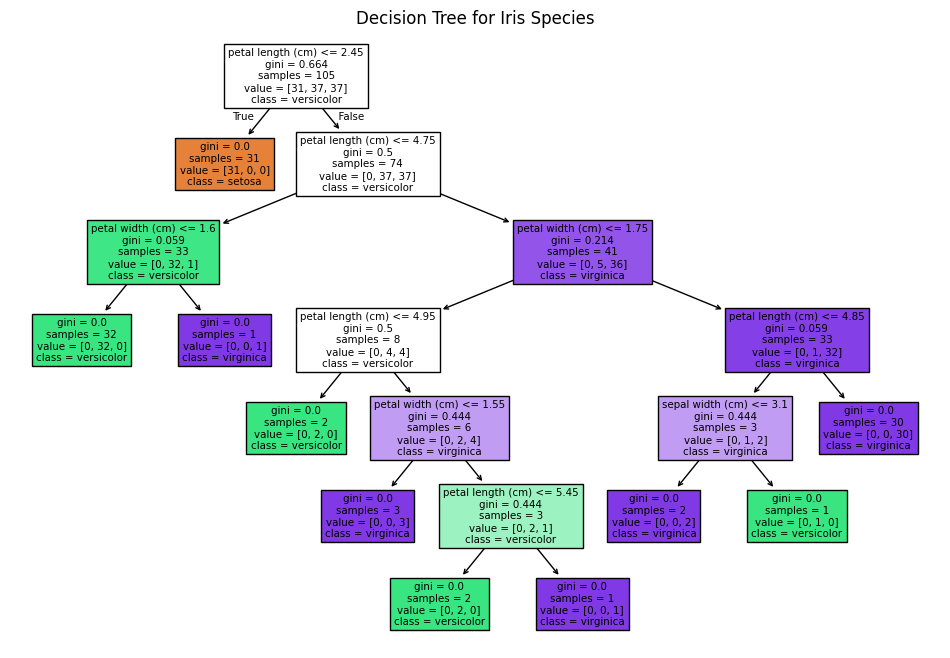

In [5]:
# Basic tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Species")
plt.show()

predictions = tree_model.predict(X_test)

In [6]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nAccuracy:", accuracy_score(y_test, predictions))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy: 1.0


# 1. Basic Decision Tree (weighted data)

In [7]:
a = np.array(
    [
        [1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 0]
    ])

In [8]:
a

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0]])

In [9]:
a[1,:]

array([0, 1, 1, 1, 0, 0])

In [10]:
a[1,:].argsort()

array([0, 4, 5, 1, 2, 3])

In [11]:
a[:,a[1,:].argsort()]

array([[1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 1]])

In [12]:
a[a[:,0].argsort(), :]

array([[0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0]])

In [13]:
a[:, 0]

array([1, 0, 0, 1, 1])

In [14]:
index = np.lexsort((a[:, 5], a[:, 4], a[:, 3], a[:, 2], a[:, 1], a[:, 0]))

In [15]:
index

array([1, 2, 0, 3, 4])

In [16]:
a[index, :]

array([[0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0]])

In [17]:
np.sort(np.unique(X, axis=0), axis=0)

array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

In [19]:
# Create frequency weights
_, counts = np.unique(y, return_counts=True)
weights = np.array([counts[y[i]] for i in range(len(y))])

In [20]:
weights

array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

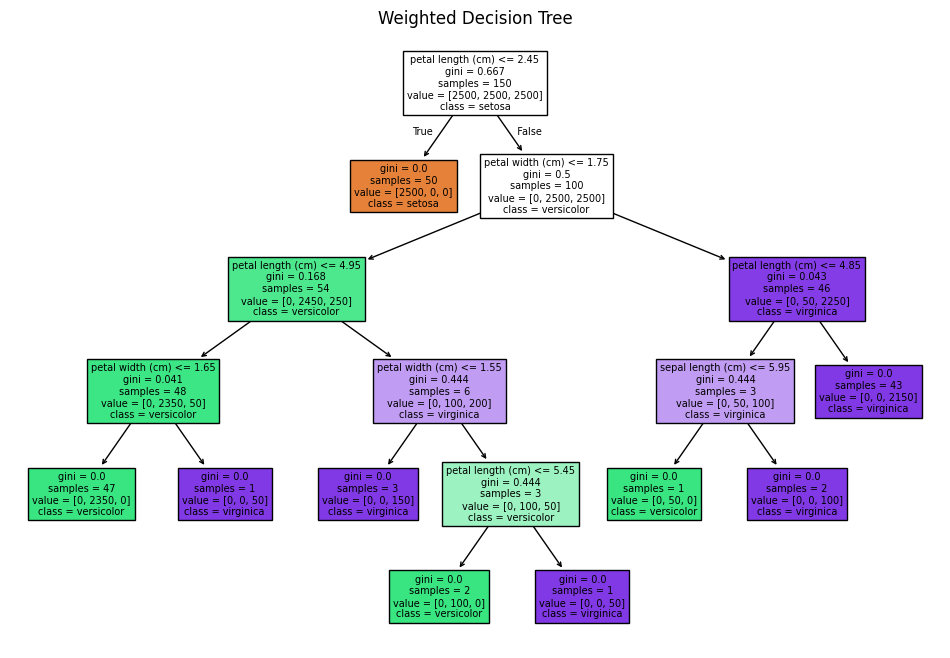

In [22]:
weighted_clf = DecisionTreeClassifier(random_state=42)
weighted_clf.fit(X, y, sample_weight=weights)

plt.figure(figsize=(12,8))
plot_tree(weighted_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Weighted Decision Tree")
plt.show()
